<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_07-Features/Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features

Engineering, Selection, and Extraction

Name

# Getting Started

* Colab - get notebook from our gitmystuff repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link


# Normal Curve and Bivariate Normal Distribution

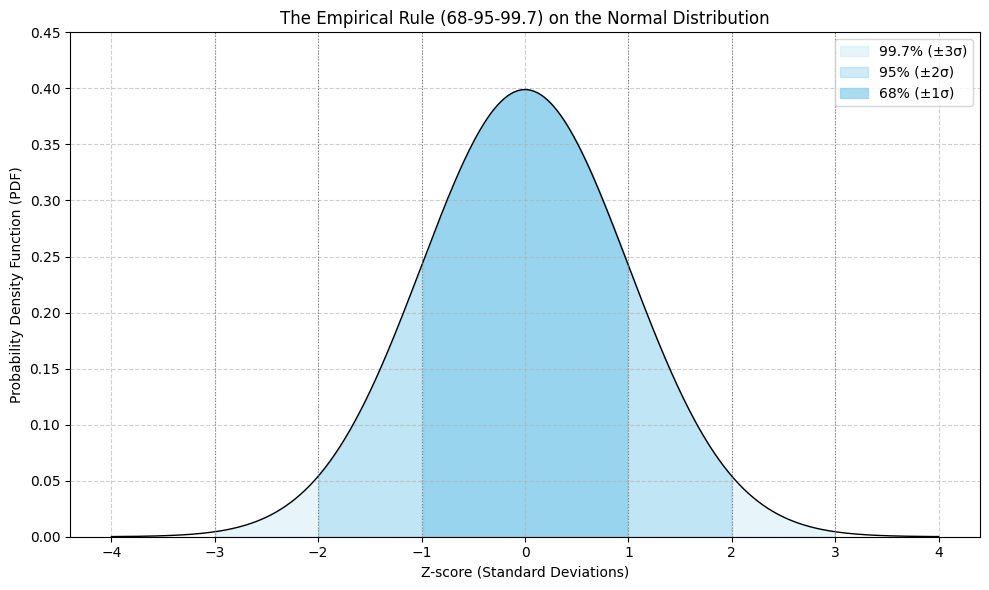

In [ ]:
# remember the normal distribution?
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Define the parameters for the standard normal distribution
mu = 0
sigma = 1

# 2. Create the x-axis range and the corresponding PDF curve (y-axis)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
y = norm.pdf(x, mu, sigma)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='black', linewidth=1)
plt.title('The Empirical Rule (68-95-99.7) on the Normal Distribution')
plt.xlabel('Z-score (Standard Deviations)')
plt.ylabel('Probability Density Function (PDF)')
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Define the boundaries for 1, 2, and 3 standard deviations
# Shade the regions from the center outwards for visual clarity
# 99.7% (3-sigma) region
x_3sigma = x[(x >= mu - 3*sigma) & (x <= mu + 3*sigma)]
y_3sigma = norm.pdf(x_3sigma, mu, sigma)
plt.fill_between(x_3sigma, y_3sigma, color='skyblue', alpha=0.2, label='99.7% (±3σ)')

# 95% (2-sigma) region
x_2sigma = x[(x >= mu - 2*sigma) & (x <= mu + 2*sigma)]
y_2sigma = norm.pdf(x_2sigma, mu, sigma)
plt.fill_between(x_2sigma, y_2sigma, color='skyblue', alpha=0.4, label='95% (±2σ)')

# 68% (1-sigma) region
x_1sigma = x[(x >= mu - 1*sigma) & (x <= mu + 1*sigma)]
y_1sigma = norm.pdf(x_1sigma, mu, sigma)
plt.fill_between(x_1sigma, y_1sigma, color='skyblue', alpha=0.7, label='68% (±1σ)')

# Add lines for the boundaries
boundaries = [-3, -2, -1, 1, 2, 3]
for b in boundaries:
    plt.axvline(b, color='gray', linestyle=':', linewidth=0.8)

plt.legend(loc='upper right')
plt.ylim(0, 0.45)
plt.tight_layout()

Correlation coefficient (ρ): 0.7


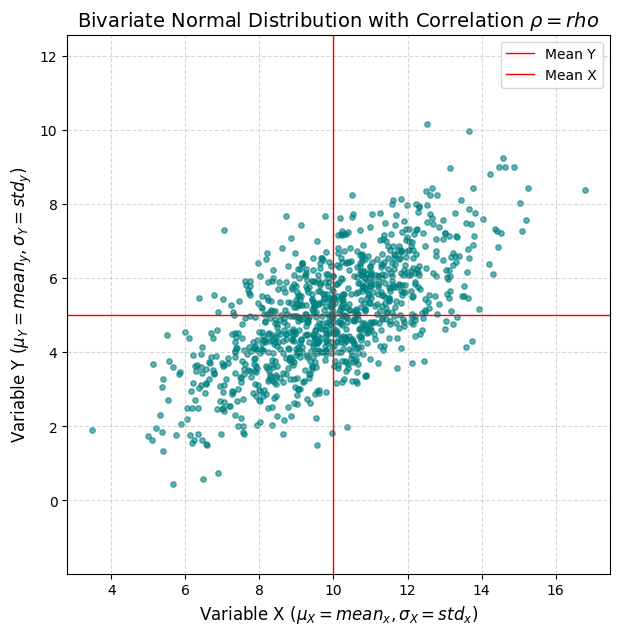

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters for the Bivariate Normal Distribution ---
# Define the means and standard deviations for X and Y
mean_x = 10
mean_y = 5
std_x = 2
std_y = 1.5

# Define the Correlation Coefficient (rho)
# This value determines the linear relationship
rho = 0.7
print(f"Correlation coefficient (ρ): {rho}")

# Construct the Covariance Matrix (Σ)
# The covariance matrix defines the spread and relationship between variables.
# The formula is: [[σx^2, ρ*σx*σy], [ρ*σx*σy, σy^2]]
covariance_matrix = [
    [std_x**2, rho * std_x * std_y],
    [rho * std_x * std_y, std_y**2]
]

# Generate 1000 data points from the Bivariate Normal Distribution
np.random.seed(42) # for reproducibility
data = np.random.multivariate_normal(
    mean=[mean_x, mean_y],
    cov=covariance_matrix,
    size=1000
)

# Separate the generated data into X and Y variables
x_data = data[:, 0]
y_data = data[:, 1]

# --- Plotting the Data ---
plt.figure(figsize=(7, 7))
plt.scatter(x_data, y_data, alpha=0.6, s=15, color='teal')

plt.title(r'Bivariate Normal Distribution with Correlation $\rho = {rho}$', fontsize=14)
plt.xlabel(r'Variable X ($\mu_X={mean_x}, \sigma_X={std_x}$)', fontsize=12)
plt.ylabel(r'Variable Y ($\mu_Y={mean_y}, \sigma_Y={std_y}$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(mean_y, color='red', linestyle='-', linewidth=1, label='Mean Y')
plt.axvline(mean_x, color='red', linestyle='-', linewidth=1, label='Mean X')
plt.legend()
plt.axis('equal') # Use equal scaling for a non-distorted view of the ellipse
plt.show()

**Most points are concentrated where the two lines cross** in the scatter plot. This is directly and fundamentally linked to the concept of the **Normal Distribution** (specifically, the Bivariate Normal Distribution) and the statistical measure of **central tendency**.

**1. Central Tendency and the Mean**

The two red lines in your scatter plot mark the **mean (or expected value)** of each variable:

* **Horizontal Red Line:** Marks the mean ($\mu_Y$) of the vertical variable ($Y$).
* **Vertical Red Line:** Marks the mean ($\mu_X$) of the horizontal variable ($X$).
* The **intersection point** is the **mean vector** $(\mu_X, \mu_Y)$, which represents the single most expected or central value of the joint distribution.

In **any** distribution, the mean is the balance point. In the **Normal Distribution**, the mean, median, and mode are all the same, making it the highest point (peak) of the distribution, where the data is most dense.

**2. The Link to the Normal Distribution (Univariate)**

The normal curve plot shows the Probability Density Function (PDF) of a standard normal distribution (the bell curve).

* The **peak** of that curve is at the mean ($\mu=0$ in the standard case).
* The definition of the Normal Distribution is that observations are **most likely to occur near the mean** and become exponentially less likely as you move further away.

Because the data in your scatter plot is likely a sample from a Bivariate Normal Distribution (as suggested by the elliptical shape):
* The $X$-values, on their own, are normally distributed, peaking around the vertical red line ($\mu_X$).
* The $Y$-values, on their own, are normally distributed, peaking around the horizontal red line ($\mu_Y$).

Therefore, the highest concentration of joint data points is naturally found where the peak density of $X$ overlaps with the peak density of $Y$—right at their intersection point.

**3. The Role of Standard Deviation**

The concentration you observe is also a visual representation of the **standard deviation** ($\sigma$).

* In a Normal Distribution, about **$68\%$** of the data lies within one standard deviation ($\pm 1\sigma$) of the mean.
* In your scatter plot, the data is most tightly clustered near the central intersection, and then it **tapers off** as you move outward—exactly mirroring the bell shape of the normal distribution, where the probability drops off in the "tails."

# Review: Variance, Covariance, Correlation, and Multicollinearity

These four statistical terms describe different aspects of variability and relationships within data.

## Variance ($\sigma^2$ or $s^2$)

**Variance** is a measure of a single variable's **dispersion** or **spread** around its mean. It answers the question: "How far do the data points typically lie from the average (expected value)?"

### Equation
The population variance, $\sigma^2$, is the average of the squared differences from the mean ($\mu$). The sample variance, $s^2$, uses $n-1$ in the denominator for an unbiased estimate.

$$\sigma^2 = \frac{\sum_{i=1}^{N} (X_i - \mu)^2}{N}$$

**Explanation of Terms:**
* $X_i$: Each individual data point.
* $\mu$: The population mean (average) of the data.
* $N$: The total number of data points in the population.
* $(X_i - \mu)^2$: The squared difference between each data point and the mean. This is squared so that negative and positive deviations don't cancel out.

***

## Covariance ($\text{Cov}(X, Y)$)

**Covariance** is a measure of the **joint variability** of two variables, $X$ and $Y$. It indicates the **direction** of their linear relationship.

### Equation
The sample covariance is calculated as:

$$\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n - 1}$$

**Explanation of Terms:**
* $X_i$ and $Y_i$: Individual data points for variables $X$ and $Y$.
* $\bar{X}$ and $\bar{Y}$: The sample means of $X$ and $Y$.
* $(X_i - \bar{X})(Y_i - \bar{Y})$: The product of the deviations of $X$ and $Y$ from their respective means.
* **Interpretation of the result:**
    * **Positive $\text{Cov}$**: $X$ and $Y$ tend to increase or decrease together.
    * **Negative $\text{Cov}$**: $X$ and $Y$ tend to move in opposite directions.
    * **$\text{Cov}$ near zero**: No clear linear relationship.

### Relationship to Variance
Variance is a special case of covariance:
$$\text{Var}(X) = \text{Cov}(X, X)$$

***

## Correlation ($\rho_{X,Y}$ or $r_{X,Y}$)

**Correlation** (specifically, the Pearson correlation coefficient) is a **standardized** measure of the linear relationship between two variables. It gives both the **strength** and the **direction** of the relationship on a scale that is easy to interpret.

### Equation
The population correlation coefficient ($\rho$) is calculated by dividing the covariance by the product of the standard deviations ($\sigma_X$ and $\sigma_Y$):

$$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} = \frac{\sum_{i=1}^{N} (X_i - \mu_X)(Y_i - \mu_Y)}{\sqrt{\sum_{i=1}^{N} (X_i - \mu_X)^2} \sqrt{\sum_{i=1}^{N} (Y_i - \mu_Y)^2}}$$

**Explanation of Terms:**
* $\text{Cov}(X, Y)$: The covariance between $X$ and $Y$ (as defined above).
* $\sigma_X$ and $\sigma_Y$: The standard deviations of $X$ and $Y$.
* **Interpretation of the result:**
    * The value is always between **$-1$ and $+1$**.
    * The sign indicates **direction** (positive or negative).
    * The magnitude (how close it is to 1 or -1) indicates **strength**.

***

## Multicollinearity

**Multicollinearity** is a statistical phenomenon in **multiple regression analysis** where two or more predictor variables are highly correlated with each other. It is not a measure of a relationship between two variables, but a diagnostic issue for a model.

### Detection (Variance Inflation Factor - VIF)

Multicollinearity is typically quantified using the **Variance Inflation Factor (VIF)**. The VIF for a predictor variable, $X_k$, measures how much the variance of the estimated regression coefficient ($\hat{\beta}_k$) is inflated due to its linear relationship with the other predictors in the model.

$$\text{VIF}_k = \frac{1}{1 - R_k^2}$$

**Explanation of Terms:**
* $R_k^2$: The coefficient of determination obtained from a separate auxiliary regression, where the predictor $X_k$ is regressed against *all the other* predictor variables in the main model.
* **Interpretation of the result:**
    * If $R_k^2$ is low, $\text{VIF}_k$ is close to 1 (meaning little multicollinearity).
    * If $R_k^2$ is high (close to 1), $\text{VIF}_k$ is very large (meaning severe multicollinearity).
    * A common rule of thumb is that a VIF greater than 5 or 10 indicates problematic multicollinearity.

# Feature Engineering

## Feature Engineering Defined

Feature engineering is the process of transforming raw data into meaningful features that can be used by machine learning models to improve their accuracy by selecting, manipulating, and creating relevant input variables from the original data, essentially making the data more suitable for prediction tasks; it's considered a crucial step in the machine learning workflow, often involving techniques like data scaling, encoding categorical variables, and combining features to reveal patterns that might not be readily apparent in the raw data.

Key points about feature engineering:
• Goal: To create features that best represent the underlying patterns in the data, allowing the machine learning model to learn more effectively and make better predictions.
* Process steps:
	* Data cleaning: Handling missing values, outliers, and inconsistencies.  
	* Feature selection: Choosing the most relevant variables from the data.
	* Feature transformation: Applying mathematical operations like scaling, normalization, or log transformation to features.   
	* Feature creation: Combining existing features to create new, potentially more predictive features.
	* Encoding: Transforming categorical data into numerical representations.  

* Importance: Feature engineering can significantly impact the performance of a machine learning model, often making the difference between good and poor predictions.



## Derived Variables

age and salary usually are correlated but ambition can create outliers because a younger person can make a million off a great idea or an older person may be an artist etc.

Ambition = YearsExperience / Age

The concept of derived variables can be used, in certain ways, to mitigate the effects of multicollinearity. However, it's crucial to understand that it's not a universal "fix," and it needs to be applied carefully. Here's how it works:

**How Derived Variables Can Help:**

* **Combining Correlated Variables:**
    * If you have two or more highly correlated variables that represent a similar underlying concept, you can create a single derived variable that captures that concept.
    * For example, if you have variables for "height in inches" and "height in centimeters," which are perfectly correlated, you could create a single "height" variable.
    * This reduces the redundancy and eliminates the direct multicollinearity between the original variables.
* **Creating Ratio or Index Variables:**
    * Sometimes, multicollinearity arises from using raw values of related variables. You can create ratio or index variables that represent the relationship between those variables.
    * For instance, instead of using "income" and "number of people in household" separately, you could create a "income per capita" variable.
    * This can reduce multicollinearity by focusing on the relative relationship rather than the absolute values.
* **Principal Component Analysis (PCA):**
    * PCA is a more advanced technique that creates derived variables called principal components. These components are linear combinations of the original variables and are designed to be uncorrelated.
    * PCA effectively transforms the original correlated variables into a new set of uncorrelated variables, addressing multicollinearity.
    * This is a form of creating derived variables, that are then used in place of the original variables.

**Important Considerations:**

* **Information Loss:**
    * Combining variables or creating indices can lead to some loss of information. You need to carefully consider whether the derived variable adequately captures the information you need.
* **Interpretability:**
    * Derived variables can sometimes be more difficult to interpret than the original variables. This is especially true with techniques like PCA, where the principal components may not have a clear real-world meaning.
* **Domain Knowledge:**
    * The decision of how to create derived variables to address multicollinearity should be guided by domain knowledge. You need to understand the relationships between your variables and choose transformations that make sense in the context of your problem.
* **Not a Universal Solution:**
    * Derived variables are not always the best solution for multicollinearity. Sometimes, simpler approaches like removing one of the correlated variables or using regularization techniques may be more appropriate.

**In summary:**

Derived variables can be a valuable tool for addressing multicollinearity, particularly when you can combine correlated variables or create meaningful ratios or indices. However, it's essential to use them judiciously and consider the potential trade-offs.


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# def calculate_ambition(df, age_weight=0.5, experience_weight=0.5, salary_weight=0.5):
#     """
#     Calculates an "ambition" score based on age, experience, and salary.

#     Args:
#         df (pd.DataFrame): DataFrame with 'Age', 'YearsExperience', and 'Salary' columns.
#         age_weight (float): Weight for age in the ambition calculation.
#         experience_weight (float): Weight for years of experience.
#         salary_weight (float): Weight for salary.

#     Returns:
#         pd.DataFrame: DataFrame with an added 'Ambition' column.
#     """

#     if not all(col in df.columns for col in ['Age', 'YearsExperience', 'Salary']):
#       raise ValueError("DataFrame must contain 'Age', 'YearsExperience', and 'Salary' columns.")

#     # Standardize the features
#     scaler = StandardScaler()
#     scaled_features = scaler.fit_transform(df[['Age', 'YearsExperience', 'Salary']])
#     scaled_df = pd.DataFrame(scaled_features, columns=['ScaledAge', 'ScaledExperience', 'ScaledSalary'])
#     df = pd.concat([df.reset_index(drop=True), scaled_df], axis=1) #reset index to avoid errors when concatenating.

#     # Calculate the ambition score
#     df['Ambition'] = (
#         (df['ScaledAge'] * age_weight) +
#         (df['ScaledExperience'] * experience_weight) +
#         (df['ScaledSalary'] * salary_weight)
#     )

#     return df

# # Example Usage (with your sample data):
# data = {'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2],
#         'Age': [21.0, 21.5, 21.7, 22.0, 22.2],
#         'Salary': [39343, 46205, 37731, 43525, 39891]}
# df = pd.DataFrame(data)

# df = calculate_ambition(df)
# df.head()

In [ ]:
# # correlation matrix
# sns.set(style="white")

# # compute the correlation matrix
# corr = df.corr()

# # generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True

# # set up the matplotlib figure
# f, ax = plt.subplots()

# # generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [ ]:
# # showing correlation of multiple features with one target
# df.drop(['ScaledSalary', 'Salary'], axis=1).corrwith(df['Salary']).plot.bar(
#         title = "Correlation with Target", fontsize = 15,
#         rot = 45, grid = True);

### Explain the concept of derived variable includeing benefits and limitations.

## Transforming Values

### Logarithm and Moore's Law

Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years. Moore's law is an observation and projection of a historical trend. Rather than a law of physics, it is an empirical relationship linked to gains from experience in production.

https://en.wikipedia.org/wiki/Moore's_law

In [ ]:
# # get the data
# import pandas as pd

# moores = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv', header=None)
# moores.columns = ['year', 'transistors']
# moores.head()

In [ ]:
# # plot the data
# import matplotlib.pyplot as plt

# plt.scatter(moores['year'], moores['transistors']);

In [ ]:
# # apply log to transistors
# import numpy as np

# moores['log_trans'] = np.log(moores.transistors)
# plt.scatter(moores['year'], moores['log_trans']);

### More on Logarithms

* 10 * 10 (10 and 100)
* 10 * 10 * 10 (10 and 1000)
* power of 0 = 1 (single item)
* power of 1 = 10
* power of 3 = thousand
* power of 6 = million
* power of 9 = billion
* power of 12 = trillion
* power of 23 = number of molecules in a dozen grams of carbon
* power of 80 = number of molecules in the universe

A 0 to 80 scale took us from a single item to the number of things in the universe.

https://betterexplained.com/articles/using-logs-in-the-real-world/

### Explain the benefits of log transforms in non-linear data:

## Imputation

### Mean, Median, Mode Imputation

* Mean if normal
* Median if skewed
* Used for MCAR

In [ ]:
# # get data
# import pandas as pd

# houses = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/house-prices.csv')
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     houses.drop('SalePrice', axis=1),
#     houses['SalePrice'],
#     test_size=0.25,
#     random_state=42)

# X_train.head()

In [ ]:
# # find nulls
# X_train.info()

In [ ]:
# X_train.isnull().sum()

In [ ]:
# for feat in X_train.columns:
#     if X_train[feat].isnull().any():
#         print(feat, X_train[feat].isnull().sum())

In [ ]:
# nulls = [feat for feat in X_train.columns if X_train[feat].isnull().any()]
# nulls

In [ ]:
# # example of some nulls
# X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

In [ ]:
# X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist();

In [ ]:
# # fill na with mean median mode
# mmm = pd.DataFrame(columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
# mmm['LotFrontage'] = X_train['LotFrontage'].fillna(round(X_train['LotFrontage'].mean(), 2))
# mmm['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
# mmm['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0])
# mmm.isnull().sum()

### Arbitrary Constants

* Discovers if MNAR
* Goal is to flag missing values
* Use values not in distribution
* Importance of missingness if present
* Depends on the model (Linear models maybe not because more arbitrary values in distribution, Trees maybe)

We don't want to impute mean, median, etc because it looks like the data. We want to emphasize the missing data because we believe it's missing not at random.

In [ ]:
# # recall missing values (non-null)
# print(X_train.shape)
# print(X_train[nulls].info())

In [ ]:
# X_train['GarageType'].fillna('Missing', inplace=True)
# X_train['GarageType'].value_counts()

### End of Distribution

* If normal we can use -3, 3 standard deviations
* If skewed we can use IQR proximity rule (iqr x 1.5, or iqr x 3)
* Flag the missing value where observations are rarely represented
* Used in finances

In [ ]:
# # histogram of LotFrontage
# X_train['LotFrontage'].hist();

In [ ]:
# # boxplot of LotFrontage
# X_train.boxplot('LotFrontage');

In [ ]:
# # iqr as na
# iqr = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(0.25)
# end_of_distribution = X_train['LotFrontage'].quantile(0.75) + (1.5 * iqr)
# X_train['LotFrontage_Imputed'] = X_train['LotFrontage'].fillna(end_of_distribution)
# print(end_of_distribution)
# print(X_train['LotFrontage_Imputed'])

In [ ]:
# X_train.boxplot('LotFrontage_Imputed');

### Discuss various forms of imputation. Why would you use one form over another?

## Categorical Encoding
* Sklearn One Hot Encoding
* Dummy Trap
* Pandas get_dummies
* Labelizer
* Weight of Evidence
* Frequency Encoding

### Categorical Data
* Nominal (Cat or Dog)
* Ordinal (Grades)
* Works better for limited labels in a category
* Engineer features with many labels

### Multicollinearity
* Predictors need to be independent of each other
* https://www.theanalysisfactor.com/multicollinearity-explained-visually/
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
* Cats_and_Dogs = [Cat, Dog, Dog, Cat, Cat, Dog]
* Cats = [1, 0, 0, 1, 1, 0]
* Dogs = [0, 1, 1, 0, 0, 1]

### Mismatch in Training and Test

* Some labels in the train set don't show up in the test set

https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde

### One Hot Encoder

In [ ]:
# # sklearn OneHotEncoder
# # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# # https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import LabelBinarizer

# pets = ['dog', 'cat', 'cat', 'dog', 'turtle', 'cat', 'cat', 'turtle', 'dog', 'cat']
# print('cat = 0; dog = 1; turtle = 2')
# le = LabelEncoder()
# int_values = le.fit_transform(pets)
# print('Pets:', pets)
# print('Label Encoder:', int_values)
# int_values = int_values.reshape(len(int_values), 1)
# print(pd.Series(pets))

# ohe = OneHotEncoder(sparse_output=False)
# ohe = ohe.fit_transform(int_values)
# print('One Hot Encoder:\n', ohe)

# lb = LabelBinarizer()
# print('Label Binarizer:\n', lb.fit_transform(int_values))

In [ ]:
# pets = pd.DataFrame(pd.Series(pets), columns=['Pets'])
# pets.head()

In [ ]:
# ohe = OneHotEncoder(sparse_output=False)
# ohe_pets = ohe.fit_transform(pets)
# pets_df = pd.DataFrame(ohe_pets, columns=ohe.get_feature_names_out(['Pets']))
# pets_df

In [ ]:
# pip install Faker

In [ ]:
# import numpy as np
# import pandas as pd
# from faker import Faker
# fake = Faker()

# output = []
# for x in range(100):
#   sex = np.random.choice(['egg', 'seed'], p=[0.5, 0.5])
#   output.append(
#     {
#         'sex': sex,
#         'brain_wave': np.random.choice(['BETA', 'ALPHA', 'THETA']),
#         'given_name': fake.first_name_female() if sex=='egg' else fake.first_name_male(),
#         'surname': fake.last_name(),
#         'space_zone': fake.zipcode(),
#         })

# df = pd.DataFrame(output)
# print(df.shape)
# print(df.info())
# df.head()

In [ ]:
# dummy_cols = ['sex', 'space_zone', 'brain_wave']
# df_dummies = pd.get_dummies(df, columns=dummy_cols)

# print(df_dummies.shape)
# df_dummies.head()

### Dummy Trap

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

https://www.learndatasci.com/glossary/dummy-variable-trap/

In [ ]:
# pets_df.corr()

In [ ]:
# ohe = OneHotEncoder(drop='first', sparse_output=False)
# ohe_pets = ohe.fit_transform(pets)
# pets_df = pd.DataFrame(ohe_pets, columns=ohe.get_feature_names_out(['Pets']))
# pets_df

In [ ]:
# pets_df.corr()

### Day of Week Encoding

* https://mikulskibartosz.name/time-in-machine-learning

### Get Dummies

In [ ]:
# # using pandas get_dummies
# import pandas as pd

# X_dummy = pd.get_dummies(X_train[['GarageType', 'GarageQual']], drop_first=True)
# y_dummy = pd.get_dummies(X_test[['GarageType', 'GarageQual']], drop_first=True)
# print(X_dummy.shape)
# print(y_dummy.shape)

In [ ]:
# # using one hot encoder
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop='first', sparse_output=False)

# ohe_train = ohe.fit_transform(X_train[['GarageType', 'GarageQual']].dropna())
# ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(['GarageType', 'GarageQual']))
# print(ohe_train.shape)
# ohe_train.head()

In [ ]:
# # ohe is already trained
# ohe_test = ohe.transform(X_test[['GarageType', 'GarageQual']].dropna())
# ohe_test = pd.DataFrame(ohe_test, columns=ohe_train.columns)
# print(ohe_test.shape)
# ohe_test.head()

### One Hot Encoding Alternatives

For features with many labels

* https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
* https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
* https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 (frequency and mean encoding)

In [ ]:
# # review features with multiple labels
# # identify features with more than 5 features
# mult_labels = []
# freq_feats = []

# for val in X_train.columns.sort_values():
#   if val in nulls:
#     print(val, len(X_train[val].dropna().unique()))
#     mult_labels.append(val)
#     if len(X_train[val].dropna().unique()) > 4:
#       freq_feats.append(val)

# print(mult_labels)
# print(freq_feats)

In [ ]:
# # fill frequency
# print(X_train['GarageType'].value_counts())
# for feat in freq_feats:
#     freq = X_train.groupby(feat).size()/len(X_train)
#     X_train[feat] = X_train[feat].map(freq)
#     freq = X_test.groupby(feat).size()/len(X_test)
#     X_test[feat] = X_test[feat].map(freq)

# print(X_train['GarageType'].value_counts())
# print(X_train['GarageType'].value_counts(normalize=True))

### Bi-Label Mapping

In [ ]:
# # get and train test split data
# import seaborn as sns
# from sklearn.model_selection import train_test_split

# titanic = sns.load_dataset('titanic')
# X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['survived'], axis=1), titanic['survived'], test_size=.25, random_state=42)
# X_train.head()

In [ ]:
# titanic.nunique()

In [ ]:
# # bi-label mapping
# # whatever you do for X_train, do for X_test
# X_train['sex'] = X_train['sex'].map({'male':0,'female':1})
# X_test['sex'] = X_test['sex'].map({'male':0,'female':1})
# X_train.head()

### Encoding Order

* Bilabel Mapping (2 labels)
* Frequency (5+ labels)
* One Hot Encoding (3 - 5 labels)

### Share your understanding of categorical encoding:

## Outliers

* Treat outliers as missing data and impute accordingly
* Impose min max values
* Take care of altering meaningful data
* Outliers should be detected and removed from train only

https://www.projectpro.io/recipes/deal-with-outliers-in-python

* Drop
* Mark
* Rescale

In [ ]:
# # get data
# from sklearn.datasets import fetch_california_housing

# housing = fetch_california_housing()
# print(housing.DESCR)

In [ ]:
# # get keys
# housing.keys()

In [ ]:
# # create housing dataframe
# import pandas as pd

# housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
# housing_df['MedHouseVal'] = housing.target
# housing_df.head()

In [ ]:
# # alternative
# california_housing = fetch_california_housing(as_frame=True)
# housing_df = pd.concat([california_housing.data, california_housing.target], axis=1)

In [ ]:
# # train test split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     housing_df.drop('MedHouseVal', axis=1),
#     housing_df['MedHouseVal'],
#     test_size=0.25,
#     random_state=42)

In [ ]:
# # histograms
# import matplotlib.pyplot as plt

# X_train.hist()
# plt.tight_layout()

In [ ]:
# # boxplots
# X_train.boxplot(rot=45)
# plt.tight_layout()

In [ ]:
# X_train.boxplot('MedInc');

In [ ]:
# import seaborn as sns

# sns.violinplot(x=X_train['MedInc']);

In [ ]:
# # prob plot
# import scipy.stats as stats

# stats.probplot(X_train['MedInc'], plot=plt);

#### Boxplot and Normal Curve Review

In [ ]:
# # compare boxplot with normal distribution
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# data = stats.norm.rvs(size=1000)
# mu, std = stats.norm.fit(data)

# x = np.linspace(-3, 3, 1000)
# p = stats.norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# plt.boxplot(data, vert=False)
# plt.xlabel('Values')
# plt.ylabel('Probabilities')
# plt.title(f'mu = {mu:.2f},  std = {std:.2f}')

# plt.show()

In [ ]:
# # compare with AveBedrms
# X_train['MedInc'].plot.kde()
# X_train.boxplot('MedInc', vert=False);

In [ ]:
# # find iqr and inner outer boundaries
# q1 = X_train['MedInc'].quantile(0.25)
# q3 = X_train['MedInc'].quantile(0.75)
# iqr = q3 - q1

# lower_inner_fence = q1 - (1.5 * iqr)
# upper_inner_fence = q3 + (1.5 * iqr)
# lower_outer_fence = q1 - (1.5 * iqr)
# upper_outer_fence = q3 + (1.5 * iqr)

# print(f'Q1: {q1:.2f} - Q3: {q3:.2f}')

In [ ]:
# # print outliers by feature
# for feat in X_train._get_numeric_data().columns[1:]:
#     q1 = X_train[feat].quantile(0.25)
#     q3 = X_train[feat].quantile(0.75)
#     iqr = q3 - q1
#     lower_fence = (q1 - 1.5 * iqr)
#     upper_fence = (q3 + 1.5 * iqr)
#     lower_count = X_train[feat][X_train[feat] < lower_fence].count()
#     upper_count = X_train[feat][X_train[feat] > upper_fence].count()
#     print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

In [ ]:
# # check our numbers
# X_train['MedInc'].describe()

### Outlier Trimming

In [ ]:
# # flag the rows with outliers
# import numpy as np

# outliers = np.where(X_train['MedInc'] < lower_inner_fence, True,
#                    np.where(X_train['MedInc'] > upper_inner_fence, True, False))

# X_train_trimmed = X_train.loc[outliers]
# print(X_train.shape, X_train_trimmed.shape)

### IQR Proximity Rule Capping

In [ ]:
# # cap outliers
# import scipy.stats as stats

# X_train['capped'] = np.where(X_train['MedInc'] < lower_inner_fence, lower_inner_fence,
#                    np.where(X_train['MedInc'] > upper_inner_fence, upper_inner_fence, X_train['MedInc']))

# stats.probplot(X_train['capped'], plot=plt);

### What are common issues that outliers cause? Why is IQR important? Summarize the characteristics of models that are robust to outliers.

## Scaling

* Coefficients of linear models are influenced by the scale of the feature
* Features with larger scales dominate smaller scales
* Some algorithms, like PCA, require features to be centered at 0

https://www.atoti.io/articles/when-to-perform-a-feature-scaling/

* from sklearn.preprocessing import MinMaxScaler
* from sklearn.preprocessing import minmax_scale
* from sklearn.preprocessing import MaxAbsScaler
* from sklearn.preprocessing import StandardScaler
* from sklearn.preprocessing import RobustScaler
* from sklearn.preprocessing import Normalizer
* from sklearn.preprocessing import QuantileTransformer
* from sklearn.preprocessing import PowerTransformer

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

### Standardization

$z = \frac{(x - \bar{x})}{\sigma}$

* Centers data around 0
* Scales the std to 1
* Preserves original shape
* Preserves outliers

In [ ]:
# X_train.drop('capped', axis=1, inplace=True)
# X_train.describe()

Characteristics of X_train
* Mean values not centered around 0
* Std not 1
* Features have various magnitudes

In [ ]:
# # standardize features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train)
# standardized_X = scaler.transform(X_train)
# standardized_yX = scaler.transform(X_test) # we use the scaler that was trained on the X_train
# X_train_standardized = pd.DataFrame(standardized_X, columns=X_train.columns)
# X_train_standardized.describe()

In [ ]:
# # compare histograms
# X_train.hist()
# X_train_standardized.hist()
# plt.tight_layout();

### MinMaxScaling (Normalization)

* Does not center the mean around 0
* Std (variance) differ
* May not preserve original shape
* 0 to 1 range
* Sensitive to outliers

In [ ]:
# # minmax scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# minmax = scaler.transform(X_train)
# # don't forget X_test
# X_train_minmax = pd.DataFrame(minmax, columns=X_train.columns)
# X_train_minmax.describe()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_minmax.hist()
# plt.tight_layout();

### Mean Normalization

* Centers the mean at 0
* Std (variance) will differ
* May alter original distribution
* -1 to 1 range
* Preserves outliers

In [ ]:
# # find the means
# means = X_train.mean(axis=0)
# means

In [ ]:
# # find the ranges
# ranges = X_train.max(axis=0) - X_train.min(axis=0)
# ranges

In [ ]:
# # mean scale the data
# X_train_meanscale = (X_train - means) / ranges
# # don't forget X_test
# X_train_meanscale.describe()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_meanscale.hist()
# plt.tight_layout();

### RobustScaler

* Replaces median with iqr
* Variance varies
* May not preserve distribution
* Min max varies
* Robust to outliers https://www.statisticshowto.com/robust-statistics/

In [ ]:
# # robust scaler
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaler.fit(X_train)
# robust = scaler.transform(X_train)
# # don't forget X_test
# X_train_robust = pd.DataFrame(robust, columns=X_train.columns)
# X_train_robust.describe()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_robust.hist()
# plt.tight_layout();

### PowerTransformers

In [ ]:
# # PowerTransformer scaler for outliers
# from sklearn.preprocessing import PowerTransformer

# feat_scales = []

# scaler = PowerTransformer()

# for feat in feat_scales:
#     X_train[feat] = scaler.fit_transform(X_train[feat].values.reshape(-1,1))

# for feat in feat_scales:
#     X_test[feat] = scaler.fit_transform(X_test[feat].values.reshape(-1,1))

### Scaling to Unit Length

* Scales a feature vector to 1, norm of 1
* Normalizes feature not observation
* Divides each observation vector by some norm
* Manhattan distance (l1)
* Euclidean distance (12)

l1(X) = |x1| + |x2| ... + |xn|

l2(X) = square root of x1^2 + x2^2 ... + xn^2

* https://en.wikipedia.org/wiki/Taxicab_geometry
* https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
* https://montjoile.medium.com/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c
* https://www.atoti.io/articles/when-to-perform-a-feature-scaling/

In [ ]:
# # unit length scaling
# from sklearn.preprocessing import Normalizer

# scaler = Normalizer('l1')
# scaler.fit(X_train)
# unitlength = scaler.transform(X_train)
# # don't forget X_test
# X_train_unitlength = pd.DataFrame(unitlength, columns=X_train.columns)
# X_train_unitlength.describe()

In [ ]:
# # recall values from original X_train
# X_train.head()

In [ ]:
# # normalize the values, treats each row as a vector and normalizes the vector
# norm_train = np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)
# print(X_train.shape)
# print(norm_train.shape)
# print(norm_train)

In [ ]:
# # compare the following with the first value in X_train_unitlength.head() below
# 4.2 / 1062

In [ ]:
# # see above
# X_train_unitlength.head()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_unitlength.hist()
# plt.tight_layout();

## Feature Engineering Summary

### Data & Variable Concepts
- **Types of Variables**: Classifying data based on its nature and mathematical properties (e.g., numerical like age, categorical like gender).
- **Variable Characteristics**: Describing the key properties of a variable, such as its distribution, number of unique values (cardinality), and presence of missing data or outliers.
- **Mixed Variables**: Variables that contain values belonging to different data types in the same column (e.g., a mix of numerical and text values).

### Data Transformation & Preparation
- **Variable Transformation**: Applying a mathematical function (like a logarithm or square root) to a variable to change its distribution (e.g., to make it more Gaussian or reduce skew) or relationship with other variables.
- **Feature Creation**: The process of generating new variables (features) from existing ones to add more predictive power to a model (e.g., combining height and weight to create a BMI feature).
- **Feature Scaling**: Adjusting the numerical range of independent variables to a standard, comparable scale (e.g., from 0 to 1 or mean 0 and standard deviation 1). This prevents features with larger magnitudes from unfairly dominating the model.
- **Discretization - Basic**: Converting a continuous numerical variable into a categorical/discrete variable by grouping values into a limited number of ordered bins (e.g., turning age into "Child," "Teen," "Adult").
- **Discretization - Other**: Advanced methods for binning, often using techniques that consider the target variable to create optimal, non-uniform bin boundaries.
- **Outlier Engineering**: Techniques used to detect and treat extreme data points (outliers). Treatment can involve removing them, transforming them, or capping/winsorizing them to a less extreme value.
- **Date-Time Features**: Extracting and creating meaningful numerical or categorical features from date and time stamps (e.g., extracting the day of the week, month, or calculating the time elapsed since a specific event).

### Missing Data Handling
- **Missing Data Imputation**: The process of replacing missing values (nulls or NaNs) with substituted values, such as the mean, median, or mode.
- **Imputation Alternative**: Methods for dealing with missing data that involve not filling in the missing values, such as deleting the rows or using models that can handle nulls natively.
- **Multivariate Imputation**: Imputation techniques that estimate missing values in a variable by taking into account the relationships between the variable with missing data and other variables in the dataset.

### Categorical Encoding
- **Categorical Encoding - Basic**: Converting categorical variables (text labels or strings) into a numerical format that machine learning models can understand, such as One-Hot Encoding (creating a new column for each category) or Label Encoding (assigning an integer to each category).
- **Categorical Encoding - Monotonic**: Encoding methods designed to convert categorical labels into numbers while maintaining a monotonic relationship (a consistent increasing or decreasing trend) with the target variable, such as Target/Mean Encoding.
- **Categorical Encoding - Rare Labels**: Methods for managing categorical variables with a large number of unique labels, many of which appear infrequently (rare labels), typically by grouping these low-frequency labels into a single, combined category.


# Feature Selection

**Feature selection** is the process of automatically or manually selecting a subset of the most **relevant features** (input variables or attributes) from your original dataset to be used in a machine learning model.

The goal is to focus the model on the variables that contribute most to its predictive power, while eliminating irrelevant, redundant, or noisy data. It's a critical step in the feature engineering pipeline.

***

### Importance and Benefits

Selecting the right features is crucial for building effective machine learning models. The main benefits include:

* **Improved Accuracy and Performance:** Removing irrelevant or redundant features can help the model focus on the meaningful signals, often leading to better predictive accuracy and generalization to new, unseen data.
* **Reduced Overfitting:** Using too many features, especially noisy ones, can cause a model to memorize the training data, including its noise, leading to **overfitting**. Feature selection simplifies the model, making it more robust.
* **Faster Training:** With fewer data points (columns) to process, models train significantly faster and require less computational resources (CPU and memory).
* **Enhanced Interpretability:** A model built with fewer, highly relevant features is simpler and easier to understand, explain, and debug.
* **Mitigating the Curse of Dimensionality:** This phenomenon refers to the challenges that arise when working with high-dimensional data (many features), which can make data analysis and modeling computationally intractable and statistically difficult. Feature selection helps reduce this complexity.

Feature selection techniques are generally categorized into three main types based on how they interact with the machine learning model.


### 1. Filter Methods

These methods use **statistical measures** to score each feature's relevance to the target variable *independently* of the machine learning model. They "filter out" less important features before model training.

* **Examples:** Correlation coefficient, Chi-squared test ($\chi^2$), Information Gain, and Variance Thresholding (removing features with little change in values).
* **Pros:** Fast, computationally inexpensive, and simple.
* **Cons:** Do not consider the feature's interactions with other features or the specific requirements of the chosen model.

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import mutual_info_classif, chi2
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Set seed for reproducibility
# np.random.seed(42)

# # Generate dataset
# n_samples = 500
# n_features = 10

# # Numerical features
# numerical_data = np.random.randn(n_samples, n_features - 2)  # 8 numerical features

# # Categorical features
# categorical_data = np.random.choice(['A', 'B', 'C', 'D'], size=(n_samples, 2))  # 2 categorical features

# # Create DataFrame
# columns_numerical = [f'num_{i}' for i in range(n_features - 2)]
# columns_categorical = ['cat_1', 'cat_2']
# df_numerical = pd.DataFrame(numerical_data, columns=columns_numerical)
# df_categorical = pd.DataFrame(categorical_data, columns=columns_categorical)

# df = pd.concat([df_numerical, df_categorical], axis=1)

# # Target variable (numerical and categorical for different methods)
# df['target_numerical'] = df['num_0'] + 0.5 * df['num_1'] + np.random.randn(n_samples) * 0.5
# df['target_categorical'] = np.random.choice(['Yes', 'No'], size=n_samples, p=[0.7, 0.3])

# # Create highly correlated features
# df['num_6'] = df['num_0'] + 0.8 * df['num_1'] + np.random.randn(n_samples) * 0.1  # Highly correlated with num_0 and num_1
# df['num_7'] = 0.7 * df['num_2'] - 0.9 * df['num_3'] + np.random.randn(n_samples) * 0.1  # Highly correlated with num_2 and num_3

# # Encode categorical target
# le = LabelEncoder()
# df['target_categorical_encoded'] = le.fit_transform(df['target_categorical'])

# # Encode categorical features
# # encoder = OrdinalEncoder()
# # df[columns_categorical] = encoder.fit_transform(df[columns_categorical])



In [ ]:
# print(df.shape)
# print(df.info())
# df.head()

In [ ]:
# X = df[columns_numerical]
# y = df['target_numerical']

# X.corrwith(y).plot.bar(
#         title = "Correlation with Target", fontsize = 15,
#         rot = 45, grid = True);

In [ ]:
# correlation = df[columns_numerical + ['target_numerical']].corr()['target_numerical'].drop('target_numerical')
# print("Correlation:\n", correlation)

The numbers represent the **Pearson correlation coefficients** between each numerical feature (`num_0` through `num_7`) and the `target_numerical` variable.

* **Pearson Correlation Coefficient:**
    * It measures the linear relationship between two variables.
    * It ranges from -1 to +1.
    * +1 indicates a perfect positive linear relationship.
    * -1 indicates a perfect negative linear relationship.
    * 0 indicates no linear relationship.

* **Interpretation of the Numbers:**
    * **num_0: 0.818159:**
        * There is a strong positive linear relationship between `num_0` and `target_numerical`. As `num_0` increases, `target_numerical` tends to increase significantly.
    * **num_1: 0.418932:**
        * There is a moderate positive linear relationship between `num_1` and `target_numerical`.
    * **num_6: 0.891622:**
        * There is a strong positive linear relationship between `num_6` and `target_numerical`. As `num_6` increases, `target_numerical` tends to increase significantly.
    * **Other Features:**
        * The correlation coefficients for the other features are close to zero, indicating weak or negligible linear relationships with `target_numerical`. Some are slightly positive and some are slightly negative.

* **Feature Selection Implications:**
    * Based on these correlation values, `num_0`, `num_1`, and `num_6` appear to be the most relevant features for predicting `target_numerical`.
    * The other features have very little linear relationship with the target, suggesting they might not be useful for predicting `target_numerical` in a linear model.
    * If you where using a linear model, you may choose to only use num_0, num_1, and num_6 as features.
    * It is important to remember that correlation only detects linear relationships. If there are non-linear relationships, correlation will not detect them.

In essence, these numbers quantify the strength and direction of the linear association between each feature and the target variable, providing valuable information for feature selection.

What do we mean by linear? A linear relationship is a mathematical relationship between two variables where the change in one variable corresponds to a constant, proportional change in the other.


In [ ]:
# # 2. Variance Inflation Factor (VIF) (numerical features only)
# vif_data = pd.DataFrame()
# vif_data["feature"] = columns_numerical
# vif_data["VIF"] = [variance_inflation_factor(df[columns_numerical].values, i) for i in range(df[columns_numerical].shape[1])]
# print("\nVIF:\n", vif_data)



There is **significant multicollinearity** in our dataset, specifically among features `num_0`, `num_1`, `num_2`, `num_3`, `num_6`, and `num_7`.

Here's a detailed interpretation:

* **High VIF Values:**
    * `num_0`: 108.43
    * `num_1`: 72.90
    * `num_2`: 44.78
    * `num_3`: 79.72
    * `num_6`: 182.24
    * `num_7`: 121.23

    These very high VIF values indicate that these features are strongly correlated with each other. This means that the variance of the regression coefficients for these features will be significantly inflated, making them unstable and unreliable.

* **Low VIF Values:**
    * `num_4`: 1.02
    * `num_5`: 1.00

    These VIF values are very close to 1, indicating that `num_4` and `num_5` are not significantly correlated with the other features.

* **Implications for Feature Selection:**
    * **Multicollinearity Problem:** The high VIF values clearly indicate a multicollinearity problem. This problem can lead to:
        * Unstable regression coefficients.
        * Difficulties in interpreting the impact of individual features.
        * Reduced statistical power.
    * **Feature Removal:** You should consider removing some of the highly correlated features. Potential strategies include:
        * Removing features with the highest VIF values.
        * Removing features that are conceptually redundant.
        * Using domain knowledge to select the most relevant features.
    * **Alternative Techniques:** You might also consider using regularization techniques (like Ridge or Lasso regression), which can mitigate the effects of multicollinearity.

* **In Summary:**
    * The VIF values highlight a severe multicollinearity issue.
    * You must address this issue before building a reliable regression model.
    * Feature selection or regularization are necessary steps.
    * Basically, the features with the high numbers are providing redundant information.


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calculate_vif(X):
#   vif = pd.DataFrame()
#   vif["features"] = X.columns
#   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#   return vif

# vif_data = calculate_vif(df[columns_numerical])
# print(vif_data)

In [ ]:
# # iterate dropping features with high vif
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# removed=[]
# x_copy1 = df[columns_numerical].copy()
# max_vif = thresh = 10
# while max_vif >= thresh:
#   my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
#   max_vif = max(my_list)
#   if max_vif > thresh:
#     max_index = my_list.index(max_vif)
#     removed.append(x_copy1.columns[max_index])
#     x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# # Calculate VIF
# vif = pd.DataFrame()
# vif["Variable"] = x_copy1.columns
# vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
# print(vif)
# print('Removed:', removed)

In [ ]:
# mutual_info =df[columns_numerical].corrwith(df['target_categorical_encoded'])
# print("\nMutual Information:\n", mutual_info)

In [ ]:
# df[columns_numerical].corrwith(df['target_categorical_encoded']).plot.bar(
#         title = "Correlation with Target", fontsize = 15,
#         rot = 45, grid = True);

The **mutual information** values between each feature in our dataset and the encoded `target_categorical_encoded` variable.

Here's a breakdown of what it means:

* **Mutual Information:**
    * Mutual information measures the statistical dependence between two variables.
    * It quantifies how much information one variable provides about the other.
    * Higher mutual information values indicate a stronger relationship.
    * A mutual information value of 0 indicates that the variables are independent.
    * Unlike correlation, mutual information can detect both linear and non-linear relationships.

In essence, this output tells you which features have some degree of statistical dependence with your categorical target variable, and how strong that dependence is.


In [ ]:
# # 4. Chi-Square (categorical features vs categorical target encoded)
# chi_square = pd.Series(chi2(pd.get_dummies(df[columns_categorical]), df['target_categorical_encoded'])[0], index=pd.get_dummies(df[columns_categorical]).columns)
# print("\nChi-Square:\n", chi_square)

The **chi-square statistics** for the categorical features (`cat_1` and `cat_2`) with respect to our encoded categorical target variable.

Here's how to interpret it:

* **Chi-Square Statistic:**
    * The chi-square test is used to determine if there is a statistically significant association between two categorical variables.
    * A higher chi-square value indicates a stronger association between the variables.
    * The chi-square test measures the difference between the observed frequencies of categories and the expected frequencies if the variables were independent.

* **Interpretation of Your Results:**
    * **cat_1: 2.674138:**
        * There is some association between `cat_1` and your categorical target. The chi-square value is not extremely high, but it suggests a degree of dependence.
    * **cat_2: 0.331291:**
        * There is a very weak association between `cat_2` and your categorical target. The chi-square value is very low, indicating that these variables are likely independent.

* **Implications for Feature Selection:**
    * `cat_1` appears to be more relevant for predicting your categorical target than `cat_2`.
    * `cat_2` seems to have little to no relationship with the target, so it might not be a useful feature.
    * To make a better determination of if cat_1 is useful, you would need to look at the p-value associated with the chi squared values. If the p value is less than your alpha, then the result is statistically significant.
    * The chi-square test provides evidence of association, but it doesn't tell you the nature or strength of the relationship.

In essence, this output helps you understand which categorical features are more likely to be related to your target variable, which is useful for feature selection.


In [ ]:
# import pandas as pd
# from sklearn.feature_selection import chi2
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# # Assuming your DataFrame 'df' is already created as in the earlier example

# # Encode categorical target if not already encoded
# if 'target_categorical_encoded' not in df.columns:
#     le = LabelEncoder()
#     df['target_categorical_encoded'] = le.fit_transform(df['target_categorical'])

# # Encode categorical features if not already encoded
# if 'cat_1' not in df.apply(pd.to_numeric, errors='coerce').columns:
#     columns_categorical = ['cat_1', 'cat_2']
#     encoder = OrdinalEncoder()
#     df[columns_categorical] = encoder.fit_transform(df[columns_categorical])

# # Chi-Square Test with P-values
# chi2_stats, p_values = chi2(pd.get_dummies(df[['cat_1', 'cat_2']]), df['target_categorical_encoded'])

# # Create Pandas Series for Chi-Square and P-values
# chi_square = pd.Series(chi2_stats, index=pd.get_dummies(df[['cat_1', 'cat_2']]).columns)
# p_values_series = pd.Series(p_values, index=pd.get_dummies(df[['cat_1', 'cat_2']]).columns)

# # Print Chi-Square and P-values
# print("\nChi-Square Statistics:\n", chi_square)
# print("\nP-Values:\n", p_values_series)

In [ ]:
# # 5. Variance Threshold (numerical features only)
# variance = df[columns_numerical].var()
# print("\nVariance:\n", variance)

Here's how to interpret the information for feature selection using variance threshold:

* **Variance Values:**
    * The image displays the variance of each numerical feature (`num_0` through `num_7`).
    * These values indicate how much the values of each feature are spread out.

* **Feature Selection Using Variance Threshold:**
    * **Threshold Selection:**
        * To perform feature selection, you need to decide on a variance threshold.
        * Features with variance below this threshold will be removed.
        * The choice of threshold depends on your data and the specific problem you are trying to solve.
    * **Interpretation:**
        * `num_4` has the lowest variance (0.862467).
        * `num_6` has the highest variance (1.719696).
        * The other features have variances in between.
    * **Example Scenario:**
        * Let's say you set a variance threshold of 0.9.
        * In this case, `num_4` would be removed because its variance (0.862467) is below the threshold.
        * All other features would be kept because their variances are above the threshold.

* **What This Tells You:**
    * Features with low variance are considered to have little information, as their values do not change much.
    * Features with high variance are considered to have more information, as their values vary more.
    * By removing low-variance features, you can reduce the dimensionality of your dataset and potentially improve the performance of your model.
    * In the provided data, num_4 has the lowest variance, and might be a good canidate for removal.


##  Wrapper Methods

These methods use the **performance of a specific machine learning model** as the evaluation criterion to select the best feature subset. They "wrap" the feature selection process around the model training.

* **Examples:**
    * **Forward Selection:** Starts with zero features and iteratively adds the feature that provides the greatest improvement in model performance.
    * **Backward Elimination:** Starts with all features and iteratively removes the least significant feature.
    * **Recursive Feature Elimination (RFE):** Recursively trains a model and eliminates the least important features according to the model's coefficients or feature importance scores.
* **Pros:** Generally result in the best-performing feature subset for the chosen model.
* **Cons:** Very computationally expensive, as they require training a new model for every subset evaluated.



In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import train_test_split

# # Generate a synthetic dataset for regression
# X, y = make_regression(n_samples=200, n_features=10, n_informative=5, random_state=42)
# feature_names = [f"feature_{i}" for i in range(X.shape[1])]
# X = pd.DataFrame(X, columns=feature_names)
# y = pd.Series(y)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a linear regression model
# model = LinearRegression()

# # Create an RFE object, selecting the top 5 features
# rfe = RFE(estimator=model, n_features_to_select=5)

# # Fit the RFE model
# rfe.fit(X_train, y_train)

# # Print the selected features
# selected_features = X_train.columns[rfe.support_]
# print("Selected Features:", selected_features)

# # Print the feature ranking (lower rank is better)
# print("\nFeature Ranking:")
# for feature, rank in zip(X_train.columns, rfe.ranking_):
#     print(f"{feature}: {rank}")

The attached output is the result of running Recursive Feature Elimination (RFE) on a dataset, which is a wrapper method for feature selection. Here's a breakdown:

**1. Selected Features:**

* `Selected Features: Index(['feature_0', 'feature_2', 'feature_3', 'feature_4', 'feature_9'], dtype='object')`
    * This line tells you which features RFE has selected as the most important.
    * In this case, `feature_0`, `feature_2`, `feature_3`, `feature_4`, and `feature_9` were chosen.
    * This means that RFE found that these five features, when used together, provide the best predictive performance for the model (in this case, a linear regression).

**2. Feature Ranking:**

* `Feature Ranking:`
    * This section shows the ranking assigned to each feature by RFE.
    * The ranking indicates the order in which features were eliminated (or retained).
    * A rank of 1 means the feature was among the top selected features.
    * Higher ranks indicate that the feature was considered less important and eliminated earlier.

* **Individual Feature Rankings:**
    * `feature_0: 1`
        * `feature_0` was one of the top 5 selected features.
    * `feature_1: 2`
        * `feature_1` was the next best feature after the top 5, and was the first feature to be eliminated.
    * `feature_2: 1`
        * `feature_2` was one of the top 5 selected features.
    * `feature_3: 1`
        * `feature_3` was one of the top 5 selected features.
    * `feature_4: 1`
        * `feature_4` was one of the top 5 selected features.
    * `feature_5: 3`
        * `feature_5` was the third feature to be eliminated.
    * `feature_6: 6`
        * `feature_6` was the last feature to be eliminated.
    * `feature_7: 4`
        * `feature_7` was the forth feature to be eliminated.
    * `feature_8: 5`
        * `feature_8` was the fifth feature to be eliminated.
    * `feature_9: 1`
        * `feature_9` was one of the top 5 selected features.

**In Summary:**

* RFE determined that `feature_0`, `feature_2`, `feature_3`, `feature_4`, and `feature_9` are the most relevant features for predicting the target variable.
* The feature ranking shows the relative importance of each feature.
* The lower the number, the more important the feature.
* This information can be used to reduce the dimensionality of your dataset and potentially improve the performance of your model.


## Embedded Methods

These methods perform feature selection as **part of the model training process itself**. The feature selection logic is "embedded" within the learning algorithm.

* **Examples:**
    * **Lasso ($\text{L}_1$) Regularization:** Adds a penalty to the loss function that shrinks the coefficients of less important features to exactly zero, effectively dropping them from the model.
    * **Tree-based Algorithms:** Algorithms like Random Forests and Gradient Boosted Trees inherently rank features by importance based on how often they are used in the splitting process and how much they reduce impurity (like Gini impurity or entropy).
* **Pros:** Combine the speed of filter methods with the accuracy of wrapper methods; they are less computationally intensive than wrappers and consider feature interactions.
* **Cons:** The selected features are specific to the model being used.

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import make_regression
# from sklearn.linear_model import Lasso, Ridge, ElasticNet
# from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor

# # Generate a synthetic dataset for regression
# X, y = make_regression(n_samples=200, n_features=10, n_informative=5, random_state=42)
# feature_names = [f"feature_{i}" for i in range(X.shape[1])]
# X = pd.DataFrame(X, columns=feature_names)
# y = pd.Series(y)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)



In [ ]:
# # Lasso
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train_scaled, y_train)
# lasso_selected_features = X_train.columns[lasso.coef_ != 0]
# print("Lasso Selected Features:", lasso_selected_features)
# print("Lasso Coefficients:")
# for feature, coef in zip(X_train.columns, lasso.coef_):
#     print(f"{feature}: {coef:.4f}")

In [ ]:
# # Ridge (Ridge does not perform feature selection in the same way as Lasso, it reduces the impact of less important features.)
# ridge = Ridge(alpha=0.5)
# ridge.fit(X_train_scaled, y_train)
# # print("Ridge Coefficients:", ridge.coef_)

# threshold = np.median(np.abs(ridge.coef_))  # Example: Median as threshold
# selected_features = X_train.columns[np.abs(ridge.coef_) > threshold]
# print("\nSelected Features (Based on Threshold):", selected_features)

# print("Ridge Coefficients:")
# for feature, coef in zip(X_train.columns, ridge.coef_):
#     print(f"{feature}: {coef:.4f}")

In [ ]:
# # Elastic Net
# elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic_net.fit(X_train_scaled, y_train)
# elastic_net_selected_features = X_train.columns[elastic_net.coef_ != 0]
# print("\nElastic Net Selected Features:", elastic_net_selected_features)
# print("Elastic Net Coefficients:")
# for feature, coef in zip(X_train.columns, elastic_net.coef_):
#     print(f"{feature}: {coef:.4f}")

The results of using **Elastic Net** for feature selection and coefficient estimation in a regression problem. Here's a breakdown:

**1. Elastic Net Selected Features:**

* `Elastic Net Selected Features: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'], dtype='object')`
    * This line indicates that Elastic Net has retained **all 10 features** in the model.
    * This means that even though Elastic Net performs regularization (which can shrink coefficients to zero), in this particular case, it didn't eliminate any of the features entirely.
    * This result can occur when the alpha value is set low, or when all of the features are relevant to the target.

**2. Elastic Net Coefficients:**

* This section lists the coefficients assigned to each feature by the Elastic Net model.
* The coefficients represent the strength and direction of the relationship between each feature and the target variable.

* **Interpretation of Coefficients:**
    * `feature_0: 74.2486`:
        * `feature_0` has a large positive coefficient, indicating a strong positive relationship with the target.
    * `feature_1: -0.3182`:
        * `feature_1` has a small negative coefficient, indicating a weak negative relationship.
    * `feature_2: 6.9684`:
        * `feature_2` has a positive coefficient, indicating a positive relationship with the target.
    * `feature_3: 10.2524`:
        * `feature_3` has a positive coefficient, indicating a positive relationship with the target.
    * `feature_4: 36.1357`:
        * `feature_4` has a positive coefficient, indicating a positive relationship with the target.
    * `feature_5: -0.0865`:
        * `feature_5` has a very small negative coefficient, indicating a very weak negative relationship.
    * `feature_6: 0.0761`:
        * `feature_6` has a very small positive coefficient, indicating a very weak positive relationship.
    * `feature_7: 0.3326`:
        * `feature_7` has a small positive coefficient, indicating a weak positive relationship.
    * `feature_8: 0.1445`:
        * `feature_8` has a small positive coefficient, indicating a weak positive relationship.
    * `feature_9: 29.3069`:
        * `feature_9` has a positive coefficient, indicating a positive relationship with the target.
* **Observations:**
    * `feature_0`, `feature_4`, and `feature_9` have the largest coefficients, suggesting they are the most influential features.
    * `feature_1`, `feature_5`, `feature_6`, `feature_7`, and `feature_8` have very small coefficients, indicating they have a relatively minor impact.
    * Even though all the features where kept, the model has greatly reduced the impact of the features that have a very low coefficient.

**In Summary:**

* Elastic Net has kept all the features but has significantly reduced the impact of some of them.
* The coefficients provide insight into the relative importance and direction of the relationship between each feature and the target variable.
* The features with the highest coefficients are the most important features.


In [ ]:
# # Select K Best (using f_regression)
# k_best = SelectKBest(f_regression, k=5)
# k_best.fit(X_train_scaled, y_train)
# k_best_selected_features = X_train.columns[k_best.get_support()]
# print("\nSelect K Best Selected Features:", k_best_selected_features)

Let's delve into what `Select K Best Selected Features: Index(['feature_0', 'feature_1', 'feature_3', 'feature_4', 'feature_9'], dtype='object')` means in the context of feature selection.

**Understanding Select K Best:**

* **Purpose:**
    * `SelectKBest` is a feature selection method that selects the top `k` features based on a specified scoring function.
    * It's a filter method, meaning it evaluates features independently of any specific machine learning model.
* **Scoring Function:**
    * In the code you've likely used, `f_regression` was the scoring function.
    * `f_regression` calculates the F-statistic for each feature, which measures the linear relationship between the feature and the target variable.
    * Other scoring functions can also be used, such as `chi2` for categorical features.
* **K Value:**
    * The `k` parameter determines how many features to select. In this case, `k=5`, so the top 5 features were chosen.

**Interpreting the Output:**

* `Select K Best Selected Features: Index(['feature_0', 'feature_1', 'feature_3', 'feature_4', 'feature_9'], dtype='object')`
    * This line tells you that `SelectKBest` has identified `feature_0`, `feature_1`, `feature_3`, `feature_4`, and `feature_9` as the 5 best features according to the `f_regression` scoring function.
    * These features have the strongest linear relationships with the target variable, compared to the other features.
    * The `dtype='object'` part indicates that the index contains object (string) values, which are the feature names.

**Implications for Feature Selection:**

* **Relevance:**
    * `SelectKBest` suggests that these 5 features are the most relevant for predicting the target variable in a linear model.
    * They capture the most significant linear relationships.
* **Dimensionality Reduction:**
    * By selecting only these 5 features, you can reduce the dimensionality of your dataset.
    * This can simplify your model, improve its performance, and reduce the risk of overfitting.
* **Linear Relationships:**
    * Keep in mind that `f_regression` only captures linear relationships.
    * If there are non-linear relationships between the features and the target, `SelectKBest` might not select the most relevant features.

**In essence:**

* `SelectKBest` has identified the 5 features that have the strongest linear correlations with the target variable.
* These features are considered the most informative for linear modeling.
* This method is useful for reducing the number of features and simplifying your model.


In [ ]:
# # Select From Model (using RandomForestRegressor)
# rf = RandomForestRegressor(random_state=42)
# sfm = SelectFromModel(rf, threshold="median")
# sfm.fit(X_train, y_train) #note: Random forest can handle unscaled data
# sfm_selected_features = X_train.columns[sfm.get_support()]
# print("\nSelect From Model Selected Features:", sfm_selected_features)

Let's break down what `Select From Model Selected Features: Index(['feature_0', 'feature_1', 'feature_3', 'feature_4', 'feature_9'], dtype='object')` means in the context of feature selection using `SelectFromModel`.

**Understanding SelectFromModel:**

* **Purpose:**
    * `SelectFromModel` is a meta-transformer that selects features based on the importance weights assigned by a fitted machine learning model.
    * It uses the model's `coef_` or `feature_importances_` attribute to determine feature importance.
    * It's a wrapper method because it relies on the internal workings of another model.
* **Model Dependency:**
    * The features selected depend entirely on the model used within `SelectFromModel`.
    * In your case, you've likely used a `RandomForestRegressor` (or a similar model that provides feature importances).
* **Threshold:**
    * `SelectFromModel` uses a threshold to decide which features to keep.
    * Features with importance weights above the threshold are selected.
    * You've likely set the `threshold` to "median", meaning features with importance above the median importance are selected.

**Interpreting the Output:**

* `Select From Model Selected Features: Index(['feature_0', 'feature_1', 'feature_3', 'feature_4', 'feature_9'], dtype='object')`
    * This line tells you that `SelectFromModel` has selected `feature_0`, `feature_1`, `feature_3`, `feature_4`, and `feature_9` as the most important features based on the `RandomForestRegressor` model.
    * These features have importance weights above the median importance, according to the model.
    * The `dtype='object'` part indicates that the index contains object (string) values, which are the feature names.

**Implications for Feature Selection:**

* **Model-Specific Importance:**
    * The selected features are specific to the `RandomForestRegressor` model used.
    * A different model might select a different set of features.
* **Non-Linear Relationships:**
    * `RandomForestRegressor` can capture non-linear relationships, so the selected features might be relevant even if they don't have strong linear correlations with the target.
* **Feature Importance:**
    * The model's feature importance scores indicate the relative contribution of each feature to the model's predictive performance.
    * Higher importance scores mean the feature is more influential.
* **Dimensionality Reduction:**
    * By selecting only these features, you can reduce the dimensionality of your dataset and potentially improve the generalization performance of your model.

**In essence:**

* `SelectFromModel` has used the `RandomForestRegressor` to identify the features that are most important for predicting the target variable, based on the model's internal feature importance scores.
* These features are considered the most relevant according to the model's assessment.
* This method is useful for selecting features based on a specific model's understanding of feature importance.


# Feature Extraction

**Feature extraction** in data science is the process of transforming **raw data** into a reduced, more informative set of **features** (attributes) that capture the essential characteristics of the original data.

---

#### Purpose and Benefits

The primary goal of feature extraction is to reduce the data's complexity and dimensionality while keeping the information needed for a machine learning model to perform effectively.

* **Reduces Dimensionality:** It cuts down the number of variables in the dataset, which is critical for handling vast, high-dimensional data (like images or text), making models cheaper and faster to run.
* **Improves Model Performance:** By filtering out redundant or irrelevant information (noise), models can train faster, achieve higher accuracy, and are less likely to suffer from **overfitting** (performing well on old data but poorly on new data).
* **Enhances Data Representation:** The resulting new features often represent the underlying patterns in the data more clearly than the raw input, making it easier for algorithms to learn.

---

#### Feature Extraction vs. Feature Selection

It's helpful to understand how feature extraction differs from **feature selection**:

* **Feature Extraction:**
    * **Process:** Mathematically **transforms** the original features to create an entirely new, smaller set of features.
    * **New Features:** The new features are typically **combinations** or mathematical projections of the initial ones (e.g., principal components).
    * **Example:** Using **Principal Component Analysis (PCA)** to generate two new, combined variables from ten original ones.

* **Feature Selection:**
    * **Process:** **Selects** a specific subset of the *original* features and completely discards the rest.
    * **New Features:** The resulting dataset only contains the original, un-transformed features that were deemed most useful.
    * **Example:** Removing an original feature like "Customer ID" because it has no predictive power for sales.

---

#### Common Techniques

Some of the most common feature extraction techniques include:

* **Principal Component Analysis (PCA):** A technique that transforms a set of correlated variables into a smaller, **uncorrelated** set called principal components, capturing most of the data's variance.
* **Linear Discriminant Analysis (LDA):** Used in supervised learning to create new features that maximize the separation (or distinction) between different output classes.
* **Autoencoders:** A type of neural network that learns a compressed, efficient representation (the encoding) of the input data, often used with image data.
* **Techniques for Text Data:** Methods like **Term Frequency-Inverse Document Frequency (TF-IDF)** transform raw text documents into numerical feature vectors that represent the importance of each word.

## Intro to Linear Algebra for Data Science

Integrating linear algebra is essential for teaching **feature engineering, selection, and extraction**.

### Feature Representation and Basic Operations

The core representation of data in machine learning is rooted in linear algebra.

* **Vectors**
    * **Concept:** An ordered array of numbers.
    * **Application:** A single **feature vector** (row) represents one data point, while a vector (column) represents one feature across all data points.

* **Matrices**
    * **Concept:** A rectangular array of numbers.
    * **Application:** The entire dataset is a **matrix** where rows are samples and columns are features.

* **Dot Product**
    * **Concept:** The sum of the products of corresponding elements of two vectors.
    * **Application:** Used for calculating **similarity** (e.g., **cosine similarity**) between feature vectors or for weighted sums in linear models.

* **Scalar/Vector/Matrix Multiplication**
    * **Concept:** Multiplying data by a constant or applying linear transformations.
    * **Application:** Used for **scaling** (e.g., standardizing or normalizing features) and applying complex transformations to the feature space.

---

### Feature Selection: Understanding Relationships

Linear algebra provides tools to analyze the relationships and redundancy between features.

* **Matrix Rank**
    * **Concept:** The maximum number of linearly independent rows or columns.
    * **Application:** Indicates the number of linearly independent features. A low rank suggests **multicollinearity** (redundancy) among features, motivating feature selection.

* **Determinant**
    * **Concept:** A scalar value that can be computed from the elements of a square matrix.
    * **Application:** Related to the "volume" spanned by the feature vectors. A determinant close to zero signals high **multicollinearity**.

* **Eigenvalues & Eigenvectors**
    * **Concept:** Special values and vectors used in matrix factorization.
    * **Application:** Used implicitly or explicitly in many selection methods (e.g., Recursive Feature Elimination - RFE) and are the fundamental basis for Principal Component Analysis (PCA).

* **Covariance Matrix**
    * **Concept:** A square matrix summarizing the variance of features and covariance between pairs.
    * **Application:** Shows the variance of each feature and the covariance between every pair, crucial for understanding feature redundancy and interdependence before selection.

---

### Feature Extraction: Dimensionality Reduction

This is the most direct application of linear algebra in feature engineering.

#### Principal Component Analysis (PCA)

* **Key Idea:** Find a new set of orthogonal (uncorrelated) features (**principal components**) that capture the maximum variance in the data.
* **Linear Algebra Concepts:**
    * **Change of Basis:** The principal components define a new coordinate system (basis) for the data.
    * **Eigen-decomposition:** PCA is mathematically solved by finding the **eigenvectors** and **eigenvalues** of the **covariance matrix**.
    * **Projection:** The final step involves projecting the original high-dimensional feature vectors onto the subspace defined by the top eigenvectors.

#### Linear Discriminant Analysis (LDA)

* **Key Idea:** Find a low-dimensional subspace that maximizes the separation between classes (a supervised technique).
* **Linear Algebra Concepts:**
    * Involves the **scatter matrices** (within-class and between-class) and solving a generalized **eigenvalue problem** to find the optimal projection vectors that achieve class separation.


### Key Linear Algebra Terms and Examples

* **Vector**
    * **Definition:** An ordered array of numbers used to represent data points or features.
    * **Practical Example:** A single observation in your dataset is a feature vector $\mathbf{x} = [25, 1, 60000]$ (Age, Gender, Salary).

* **Matrix**
    * **Definition:** A rectangular array of numbers representing the entire dataset (rows are samples, columns are features).
    * **Practical Example:** Your entire dataset of 1,000 customers with 50 features is a $1000 \times 50$ matrix of feature data.

* **Dot Product**
    * **Definition:** An operation returning a scalar that measures similarity or linear combination.
    * **Practical Example:** Calculating the **cosine similarity** between two customer feature vectors to find out how similar their purchasing habits are.

* **Scalar Multiplication**
    * **Definition:** Multiplying a vector or matrix by a single number (a scalar) to scale all elements uniformly.
    * **Practical Example:** **Normalizing** a feature by dividing every value in the feature column by its maximum value to scale it between 0 and 1.

* **Matrix Rank**
    * **Definition:** The maximum number of linearly independent rows or columns.
    * **Practical Example:** If your $10 \times 10$ feature matrix has a **rank** of 8, it means two features are perfectly redundant, motivating selection.

* **Multicollinearity**
    * **Definition:** A state where two or more features are highly or perfectly linearly related.
    * **Practical Example:** When "Age in Years" and "Age in Months" are both included as features, the data matrix exhibits high **multicollinearity**.

* **Covariance Matrix**
    * **Definition:** A square, symmetric matrix summarizing variance and covariance between feature pairs.
    * **Practical Example:** Analyzing the **covariance matrix** is the first step in PCA; a high off-diagonal value suggests a strong linear relationship.

* **Eigenvector**
    * **Definition:** A non-zero vector that changes only by a scalar factor when a transformation is applied.
    * **Practical Example:** In PCA, the **eigenvectors** are the **Principal Components**—the new, uncorrelated directions of maximum variance.

* **Eigenvalue**
    * **Definition:** The scalar factor associated with an eigenvector, representing the variance captured by that component.
    * **Practical Example:** In PCA, you select the top $k$ components whose **eigenvalues** sum up to 90% of the total variance.

* **Change of Basis**
    * **Definition:** Transforming a set of vectors from one coordinate system to a new coordinate system defined by new basis vectors.
    * **Practical Example:** PCA performs a **change of basis** by rotating the original feature space onto a new space defined by the Principal Components, transforming correlated features into uncorrelated ones.

* **Projection**
    * **Definition:** Casting a high-dimensional vector onto a lower-dimensional subspace or line.
    * **Practical Example:** After finding the top 10 Principal Components, you **project** your 100-dimensional data matrix onto the new 10-dimensional subspace to achieve **dimensionality reduction**.

### Data as a Matrix

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # --- Standardize the data (a crucial step for PCA) ---
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_numerical.iloc[:, :5])

# # The standardized features matrix is our starting point
# # We use NumPy's array for direct linear algebra operations
# X = X_scaled

# print(f"Feature Matrix Shape (Samples x Features): {X.shape}")
# # Feature Matrix Shape (Samples x Features): (500, 8)
# print(X[0:5, :])

### Feature Representation: Vectors and Matrices

* **Feature Matrix**
    * **Code:** `X`
    * **Explanation:** Represents the entire dataset, which in this case is 500 samples $\times$ 8 features. The rows are individual data points, and the columns are the features.

* **Sample Vector**
    * **Code:** `X[0, :]`
    * **Explanation:** This is a vector representing the first data point (the first row) measured across all 8 features. Mathematically, the vector is in an 8-dimensional space ($\mathbf{x}_{\text{sample}} \in \mathbb{R}^8$).

* **Feature Vector**
    * **Code:** `X[:, 0]`
    * **Explanation:** This is a vector representing the values of a single feature (the first column, e.g., `num_0`) across all 500 samples. Mathematically, the vector is in a 500-dimensional space ($\mathbf{x}_{\text{feature}} \in \mathbb{R}^{500}$).

* **Dot Product (Similarity)**
    * **Code:** `np.dot(X[0, :], X[1, :])`
    * **Explanation:** Calculates the dot product between the first two sample vectors. This value is proportional to the **cosine similarity** between the two data points, indicating how similar their feature values are.





In [ ]:
# # Illustrate a Sample Vector and Feature Vector
# print("\n--- 1. Feature Representation ---")
# print(f"\nObservation Vector (1st data point): \n{X[0, :][:5]}")
# print(f"\nFeature Vector (num_0 feature, first 5 samples): \n{X[:, 0][:5]}")

### Dot Product of $\mathbf{y} \cdot \mathbf{f}_j$

The scalar result of $\mathbf{y} \cdot \mathbf{f}_j$ is a measure of the raw, unnormalized **linear alignment** between the target variable and that single feature.

* **Magnitude:** It shows how much the feature and the target tend to change together.
* **Direction:** A positive result means they generally increase together; a negative result means one increases while the other decreases.

It's mathematically related to the **covariance** and **correlation** between the feature and the target, which are the *inputs* used to calculate the coefficient.

### How the Coefficient ($\beta_j$) is Determined

The coefficient $\beta_j$ is the value that tells you the change in the target for a one-unit change in feature $j$, **while holding all other features constant**.

To find $\beta_j$, the calculation must account for:

1.  **Normalization:** The variance of the feature itself.
2.  **Multicollinearity:** The relationships (correlations) between feature $j$ and **all other features** in the matrix $\mathbf{X}$.

The correct coefficient vector ($\boldsymbol{\beta}$) is found by solving the system of equations that minimizes the error across the entire dataset. For simple Linear Regression, this is often done using the **Normal Equation** (the closed-form solution derived from the dot product/matrix multiplication concept):

$$\boldsymbol{\beta} = (\mathbf{X}^{\text{T}}\mathbf{X})^{-1}\mathbf{X}^{\text{T}}\mathbf{y}$$

* $\mathbf{X}^{\text{T}}\mathbf{y}$ (which involves the dot product $\mathbf{y} \cdot \mathbf{f}_j$ for each feature) gives the basic alignment between features and the target.
* The term $(\mathbf{X}^{\text{T}}\mathbf{X})^{-1}$ corrects for the **redundancy and scale** among the features ($\mathbf{X}$ itself) before calculating the final coefficients $\boldsymbol{\beta}$.

### Feature Selection: Covariance and Multicollinearity

The **Covariance Matrix** is the foundation for analyzing relationships, a core step before selection or extraction.

* **Concept:** **Covariance Matrix**
    * **Code:** `np.cov(X.T)`
    * **Explanation:** This matrix measures the **variance** of each feature (on the diagonal) and the **covariance** (linear relationship) between every pair of features (off the diagonal). The transpose (`.T`) of the feature matrix $\mathbf{X}$ is required because the `np.cov` function in NumPy expects each feature to be represented as a row, not a column, by default.

In [ ]:
# # Calculate the Covariance Matrix (C)
# C = np.cov(X.T)

# print("\n--- 2. Covariance Matrix (C) ---")
# print(f"Shape of C (Features x Features): {C.shape}")
# print(f"Covariance Matrix (top-left 4x4):\n{C[:4, :4]}")
# print("\nCorrelation Matrix:")
# print(df_numerical.iloc[:, :5].corr())

The **covariance matrix** is a fundamental concept in linear algebra and statistics, particularly useful in feature analysis like Principal Component Analysis (PCA). It's a square, symmetric matrix that summarizes the variance and relationship (covariance) between every pair of features in your dataset.

**The Covariance Matrix: Structure and Purpose**

A covariance matrix $C$ for a dataset with $D$ features will be a $D \times D$ square matrix.

$$
C = \begin{pmatrix}
\text{Cov}(f_1, f_1) & \text{Cov}(f_1, f_2) & \cdots & \text{Cov}(f_1, f_D) \\
\text{Cov}(f_2, f_1) & \text{Cov}(f_2, f_2) & \cdots & \text{Cov}(f_2, f_D) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(f_D, f_1) & \text{Cov}(f_D, f_2) & \cdots & \text{Cov}(f_D, f_D)
\end{pmatrix}
$$

The matrix has two key parts: the **diagonal elements** and the **off-diagonal elements**.

**The Diagonal: Variance $\sigma^2$**

The elements along the main diagonal (where the row index equals the column index, $C_{i,i}$) represent the **variance** of each individual feature.

* **Formula:** $\text{Cov}(f_i, f_i) = \text{Var}(f_i) = \sigma_i^2$
* **What it Measures:** Variance measures how much a single feature, $f_i$, deviates from its own mean. It quantifies the **spread** or **scatter** of the data along that single dimension.
* **Significance in Feature Analysis:** A large variance on the diagonal indicates that the feature holds a **wide range of information** across the samples. Features with very low variance might be candidates for removal during feature selection, as they provide little distinctive value (they don't change much from sample to sample).

**The Off-Diagonal: Covariance $\text{Cov}$**

The off-diagonal elements (where $i \neq j$) represent the **covariance** between two different features, $f_i$ and $f_j$.

* **Formula:** $\text{Cov}(f_i, f_j) = E[(f_i - \mu_i)(f_j - \mu_j)]$
* **What it Measures:** Covariance measures the **direction** and **strength** of the linear relationship between two features.
    * **Positive Covariance:** The two features tend to increase or decrease together. (e.g., Age and Salary).
    * **Negative Covariance:** As one feature increases, the other tends to decrease. (e.g., Car Age and Car Price).
    * **Near Zero Covariance:** The two features are linearly independent (no strong linear relationship).
* **Significance in Feature Extraction (PCA):** High, non-zero covariance values are the primary motivation for feature extraction. A large off-diagonal value means the two features contain **redundant information**. PCA aims to find a new basis (eigenvectors) where the resulting covariance matrix is mostly zero in the off-diagonal entries, meaning the new features (Principal Components) are **uncorrelated**.

**Key Properties**

1.  **Symmetry:** The matrix is symmetric ($\text{Cov}(f_i, f_j) = \text{Cov}(f_j, f_i)$), so $C_{i,j} = C_{j,i}$. This means you only need to calculate the unique elements above the diagonal.
2.  **Relation to Correlation:** The covariance values are dependent on the **scale** of the features. The **Correlation Matrix** is essentially a normalized covariance matrix, where all features are scaled to have a variance of 1, making the off-diagonal values (correlation coefficients) easier to interpret (they range from -1 to 1).

**The Relationship: Normalization**

The correlation coefficient between any two features, $f_i$ and $f_j$, is calculated by **dividing** their covariance by the product of their individual standard deviations:

$$r_{i,j} = \frac{\text{Cov}(f_i, f_j)}{\sqrt{\text{Var}(f_i)} \cdot \sqrt{\text{Var}(f_j)}} = \frac{C_{i,j}}{\sigma_i \sigma_j}$$

* $C_{i,j}$ is the **covariance** between feature $i$ and feature $j$.
* $\sigma_i = \sqrt{\text{Var}(f_i)}$ is the **standard deviation** of feature $i$.

**Why Normalization is Used**

The correlation matrix is essentially the covariance matrix of the **standardized** data. This normalization serves a critical purpose:

* **Scale Independence:** Covariance values are sensitive to the scale of the features (e.g., changing a feature from meters to centimeters changes the covariance value). Correlation removes this dependency, resulting in a scale-invariant measure.
* **Bounded Interpretation:** The correlation coefficient ($R_{i,j}$) is always bounded between $-1$ and $1$, making it easy to interpret the strength of the linear relationship:
    * **+1:** Perfect positive correlation.
    * **0:** No linear correlation.
    * **-1:** Perfect negative correlation.

### Feature Extraction: Eigen-decomposition & PCA

We use the covariance matrix to find the eigenvectors and eigenvalues, which are the basis for **Principal Component Analysis (PCA)**.

**Eigen-decomposition**
* **Code:** `np.linalg.eig(C)`
* **Explanation:** This is the process of solving for the **eigenvalues** (variance captured) and **eigenvectors** (the principal component directions) of the **covariance matrix**, $C$.

**Eigenvalues**
* **Code:** `eigenvalues`
* **Explanation:** The values, $\lambda_i$, that represent the **variance** explained by each corresponding eigenvector (Principal Component). They are used to determine how many components to keep.

**Eigenvectors**
* **Code:** `eigenvectors`
* **Explanation:** The vectors, $\mathbf{v}_i$, that define the new orthogonal **Principal Components**. These vectors serve as the new feature axes onto which the data is projected.

**Projection (PCA)**
* **Code:** `pca.fit_transform(X)`
* **Explanation:** This function performs the final PCA transformation, projecting the original, high-dimensional data ($\mathbf{X}$) onto a lower-dimensional subspace defined by the selected principal components.

In [ ]:
# # Calculate Eigenvalues and Eigenvectors
# eigenvalues, eigenvectors = np.linalg.eig(C)

# print("\n--- 3. Eigen-decomposition for PCA ---")
# print(f"Eigenvalues (Variance Explained):\n{eigenvalues}")
# print(f"Eigenvectors (Principal Components, first 4 rows/cols):\n{eigenvectors[:4, :4]}")

# # Demonstrate Dimensionality Reduction (PCA)
# # We will reduce from 8 features down to 2 components (k=2)
# N_COMPONENTS = 2
# pca = PCA(n_components=N_COMPONENTS)
# X_reduced = pca.fit_transform(X)

# print("\n--- 4. Dimensionality Reduction (PCA) ---")
# print(f"Original Data Shape: {X.shape}")
# print(f"Reduced Data Shape (k={N_COMPONENTS}): {X_reduced.shape}")
# print(f"Variance explained by the top 2 components: {pca.explained_variance_ratio_.sum():.2f}")
# print(f"The first data point's new 2 features:\n{X_reduced[0, :]}")

### Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are calculated from the covariance matrix by solving a specific equation known as the **eigen-decomposition problem** (or characteristic equation). This is a core concept in Principal Component Analysis (PCA).

#### 1. The Characteristic Equation

The goal is to find special vectors ($\mathbf{v}$) and corresponding scalars ($\lambda$) that satisfy the following equation:

$$\mathbf{C}\mathbf{v} = \lambda\mathbf{v}$$

Where:
* $\mathbf{C}$ is the square **covariance matrix** (Features $\times$ Features).
* $\mathbf{v}$ is the **eigenvector** (the direction or principal component).
* $\lambda$ is the **eigenvalue** (the amount of variance captured along that direction $\mathbf{v}$).

This equation states that when the covariance matrix ($\mathbf{C}$) transforms the eigenvector ($\mathbf{v}$), the result is simply the eigenvector scaled by a factor ($\lambda$).

#### 2. Solving for the Eigenvalues ($\lambda$)

To solve the characteristic equation, we rearrange it:

$$\mathbf{C}\mathbf{v} - \lambda\mathbf{v} = 0$$

Since $\mathbf{v} = \mathbf{I}\mathbf{v}$ (where $\mathbf{I}$ is the Identity matrix), we can factor out the eigenvector $\mathbf{v}$:

$$(\mathbf{C} - \lambda\mathbf{I})\mathbf{v} = 0$$

For a non-trivial solution (i.e., $\mathbf{v} \neq 0$), the matrix $(\mathbf{C} - \lambda\mathbf{I})$ must be non-invertible (singular). This happens if and only if its **determinant** is zero:

$$\det(\mathbf{C} - \lambda\mathbf{I}) = 0$$

1.  **Form the Characteristic Polynomial:** Solving this determinant equation generates a polynomial in terms of $\lambda$. For an $n \times n$ covariance matrix, you get a polynomial of degree $n$.
2.  **Find the Roots:** The $n$ roots of this polynomial are the **eigenvalues** ($\lambda_1, \lambda_2, \dots, \lambda_n$). These are the values that tell you how much variance each corresponding principal component captures.

#### 3. Solving for the Eigenvectors ($\mathbf{v}$)

Once you have the eigenvalues ($\lambda$), you plug each one back into the original rearranged equation to find its corresponding eigenvector:

$$(\mathbf{C} - \lambda_i\mathbf{I})\mathbf{v}_i = 0$$

1.  **Substitute $\lambda_i$:** For each eigenvalue $\lambda_i$, you substitute it into the matrix $(\mathbf{C} - \lambda_i\mathbf{I})$.
2.  **Solve the System:** You then solve the resulting system of linear equations for the vector $\mathbf{v}_i$. There will be an infinite number of solutions, but convention requires that the eigenvectors be **unit vectors** (length of 1).
3.  **Result:** The resulting $\mathbf{v}_i$ is the **eigenvector** (Principal Component) associated with the eigenvalue $\lambda_i$.

The final set of paired **eigenvalues and eigenvectors** is the output of the eigen-decomposition of the covariance matrix, which is used to perform dimensionality reduction in PCA.

### Example Walkthrough: Eigen-Decomposition

#### Step 1: Start with the Covariance Matrix ($\mathbf{C}$)

Let's assume our dataset has two features, $f_1$ and $f_2$. We've already calculated their standardized covariance matrix:

$$\mathbf{C} = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}$$

* **Diagonal:** Variance of $f_1$ is 2, and variance of $f_2$ is 2.
* **Off-Diagonal:** Covariance between $f_1$ and $f_2$ is 1 (they are positively correlated).

#### Step 2: Solve for the Eigenvalues $\lambda$

We use the characteristic equation:

$\det(\mathbf{C} - \lambda\mathbf{I}) = 0$.

1.  **Form the Matrix** $(\mathbf{C} - \lambda\mathbf{I})$

$$\mathbf{C} - \lambda\mathbf{I} = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} 2-\lambda & 1 \\ 1 & 2-\lambda \end{pmatrix}$$

2.  **Calculate the Determinant and Set to Zero:**
The determinant of a $2 \times 2$ matrix $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$ is $(ad - bc)$.

$$\det(\mathbf{C} - \lambda\mathbf{I}) = (2-\lambda)(2-\lambda) - (1)(1) = 0$$   $$(4 - 4\lambda + \lambda^2) - 1 = 0$$   $$\lambda^2 - 4\lambda + 3 = 0$$

3.  **Find the Roots (The Eigenvalues):**
We factor the quadratic equation:
$$(\lambda - 3)(\lambda - 1) = 0$$
This gives us two eigenvalues:
$$\lambda_1 = 3 \quad \text{and} \quad \lambda_2 = 1$$

* **Interpretation:** The first principal component (PC1) captures a variance of 3, and the second principal component (PC2) captures a variance of 1. PC1 is the more important component for dimensionality reduction.

#### Step 3: Solve for the Eigenvectors ($\mathbf{v}$)

We use the equation $(\mathbf{C} - \lambda\mathbf{I})\mathbf{v} = 0$, or $\mathbf{C}\mathbf{v} = \lambda\mathbf{v}$. Let $\mathbf{v} = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}$.

##### A. Finding $\mathbf{v}_1$ (for $\lambda_1 = 3$)

Substitute $\lambda_1 = 3$ into $(\mathbf{C} - 3\mathbf{I})\mathbf{v}_1 = 0$:

$$\begin{pmatrix} 2-3 & 1 \\ 1 & 2-3 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$
$$\begin{pmatrix} -1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

This gives us the equation: $-1v_1 + 1v_2 = 0$, which simplifies to $v_1 = v_2$.
We choose a simple solution, like $v_1 = 1, v_2 = 1$. The initial eigenvector is $\begin{pmatrix} 1 \\ 1 \end{pmatrix}$.

To make it a **unit vector** (length 1), we normalize it:
$$\text{Length} = \sqrt{1^2 + 1^2} = \sqrt{2}$$
$$\mathbf{v}_1 = \begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix} \approx \begin{pmatrix} 0.707 \\ 0.707 \end{pmatrix}$$

##### B. Finding $\mathbf{v}_2$ (for $\lambda_2 = 1$)

Substitute $\lambda_2 = 1$ into $(\mathbf{C} - 1\mathbf{I})\mathbf{v}_2 = 0$:

$$\begin{pmatrix} 2-1 & 1 \\ 1 & 2-1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$
$$\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

This gives us the equation: $1v_1 + 1v_2 = 0$, which simplifies to $v_1 = -v_2$.
We choose a simple solution, like $v_1 = 1, v_2 = -1$. The initial eigenvector is $\begin{pmatrix} 1 \\ -1 \end{pmatrix}$.

To make it a **unit vector**, we normalize it (the length is still $\sqrt{2}$):
$$\mathbf{v}_2 = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix} \approx \begin{pmatrix} 0.707 \\ -0.707 \end{pmatrix}$$

#### Summary and PCA Application

* **Principal Component 1 (PC1):** $\mathbf{v}_1 \approx \begin{pmatrix} 0.707 \\ 0.707 \end{pmatrix}$ with $\lambda_1 = 3$. This is the direction of maximum variance, meaning the two original features $f_1$ and $f_2$ contribute almost equally and positively to PC1.
* **Principal Component 2 (PC2):** $\mathbf{v}_2 \approx \begin{pmatrix} 0.707 \\ -0.707 \end{pmatrix}$ with $\lambda_2 = 1$. This is the direction of minimum variance.

**Feature Extraction:** Since $\lambda_1 = 3$ and $\lambda_2 = 1$, PC1 captures $3/(3+1) = 75\%$ of the total variance. You could choose to drop PC2 and project your data onto the $\mathbf{v}_1$ line, reducing the data from 2 features to 1 while retaining 75% of the information.

### How is the dot product (or matrix multiplication) used in the derivation or calculation of the feature coefficients (weights) in a linear model like Linear Regression?

### Explain the eigen-decomposition problem.

## Feature Extraction vs Feature Selection

### Feature Extraction for CNNs (Computer Vision)

In **CNNs**, **feature extraction** is the primary function of the **convolutional layers**. It's the process of automatically learning and creating new, compact, and abstract representations (**features**) from raw pixel data.

#### How it Works

* **Convolutional Layers:** These layers use learnable **filters (kernels)** to scan the input image. Each filter detects a specific spatial pattern (e.g., a vertical edge, a texture). The output, called a **feature map**, is a new, engineered feature showing where that specific pattern exists.
* **Hierarchical Learning:**
    * **Early Layers** extract simple, generic features (e.g., edges, curves).
    * **Deeper Layers** combine these simple features to extract complex, high-level semantic features (e.g., an eye, a wheel, or a whole object).
* **Transfer Learning:** In practice, this often involves taking a **pre-trained CNN** (e.g., on ImageNet), removing its final classification layer, and using the output of the last convolutional/pooling layer as the extracted **feature vector** for a new, related task. This vector is a highly condensed and useful set of features representing the original image.

### Feature Extraction for LLMs (Natural Language Processing)

For **Large Language Models (LLMs)** based on the Transformer architecture, **feature extraction** is the process of converting raw text into **rich, context-aware numerical representations (vectors)** that capture the text's meaning, syntax, and semantics.

#### How it Works

* **Tokenization and Embedding:** Raw text is broken into **tokens**. Each token is mapped to an initial numerical vector called an **embedding**, which is a basic feature representing the word's semantic meaning.
* **Contextualization (The Transformer Layers):** The subsequent stacked Transformer layers, powered by the **attention mechanism**, iteratively refine these initial features. The model creates a new feature vector for every token by incorporating information from all other tokens in the sequence.
* **Abstract Feature Vectors:** The final output is a sequence of **contextualized embeddings**. These are highly complex feature vectors where:
    * The vector for the word "bank" has features that make it distinct in "river bank" versus "money bank."
    * The vectors encode features like part-of-speech, coreference, and overall sentiment or topic.

This process transforms the sequence of raw tokens into a compact matrix of linguistic features for downstream tasks.

### Feature Selection for CNNs (Computer Vision)

In CNNs, **feature selection** refers to choosing which **learned visual features** are most effective for a specific task. The challenge is often less about selection and more about determining the optimal architecture or transfer learning strategy to *extract* the right features.

#### How it Works

A CNN automatically extracts features hierarchically:

* **Early Layers (Generic Features):** Learn low-level features like edges, corners, and color blobs, useful for almost any image task.
* **Middle/Later Layers (Specific Features):** Learn high-level, semantic features specific to the training data.

#### Selection Strategies (Transfer Learning)

Feature selection in CNNs is often implemented through **Transfer Learning**:

* **Feature Extraction (Freezing):** The most common method is to use a pre-trained CNN and **freeze (lock)** all its weights up to a certain point. The output of the last frozen layer is taken as the set of **selected features** (e.g., a 2048-dimensional vector).
* **Layer Selection:** By choosing which layer's output to take, you are essentially selecting which set of learned features to use. Lower layers for generic features, and higher layers for specialized, task-specific features.

### Feature Selection for LLMs (Natural Language Processing)

For LLMs, **feature selection** takes place at two levels: the input (text) level and the internal (model) level. The most important selection process is handled internally by the **Attention Mechanism**.

#### How it Works

* **Input Feature Selection:** Traditional preprocessing before the model, such as removing stop words or using a statistical test to select the most relevant tokens (words) to include in the prompt.
* **Internal Feature Selection (Attention):** This is the most crucial part. The **self-attention mechanism** performs **dynamic feature selection** for every token at every layer:
    * **Dynamic Weighting:** When processing a token, the attention mechanism selectively weighs all other tokens in the context.
    * **Context Filtering:** If a token is irrelevant to the current word's meaning, the attention weight for the irrelevant token is effectively zeroed out. This is a sophisticated form of feature selection, as the model selects which parts of the context (which features) to use *dynamically*.

The final output feature vectors have already had irrelevant information filtered out by the attention mechanism.